In [1]:
import json
from os import listdir
import pandas as pd
import numpy as np

In [2]:
data = []
datasets = ['train', 'validation']
# datasets = ['validation']

for val in datasets:
    all_files = listdir('../../../DeepFashion2_Dataset/' + val + '/annos')
    for file in all_files:
        with open('../../../DeepFashion2_Dataset/'+val+'/annos/'+file, 'r') as f:
            distros_dict = json.load(f)
            for i in range(1,100):

                itm_i = 'item'+str(i)
                if itm_i in distros_dict:
                    # print(itm_i)
                    itm = distros_dict['item'+str(i)] 
                    r = {}
                    r['image_id'] = file.replace('json', 'jpg')
                    r['category_id'] = itm['category_id']
                    r['category_name'] = itm['category_name']
                    r['bounding_box'] = itm['bounding_box']
                    r['style'] = itm['style']
                    r['pair_id'] = distros_dict['pair_id']
                    r['source'] = distros_dict['source']
                    r['val'] = val
                    data.append(r)
                else:
                    break


In [3]:
dt_all = pd.DataFrame(data)

In [4]:
dt_all.tail()

,image_id,category_id,category_name,bounding_box,style,pair_id,source,val
364671,022559.jpg,1,short sleeve top,"[0, 0, 433, 505]",1,1318,shop,validation
364672,022559.jpg,8,trousers,"[145, 373, 466, 701]",0,1318,shop,validation
364673,016905.jpg,1,short sleeve top,"[304, 3, 586, 324]",2,670,shop,validation
364674,016905.jpg,7,shorts,"[341, 285, 556, 514]",0,670,shop,validation
364675,017617.jpg,12,vest dress,"[275, 227, 527, 823]",1,738,shop,validation


In [5]:
dt_all.shape

(364676, 8)

In [6]:
dt_all['pair_unique_id'] = dt_all['pair_id'].map(str) + '-' + dt_all['category_id'].map(str) + '-' + dt_all['style'].map(str)

In [7]:
dt_all.to_csv('deepfashion_retreival_train_val.csv', index=False)

In [8]:
dt_all = pd.read_csv('deepfashion_retreival_train_val.csv')

In [9]:
dt_all.tail()

,image_id,category_id,category_name,bounding_box,style,pair_id,source,val,pair_unique_id
364671,022559.jpg,1,short sleeve top,"[0, 0, 433, 505]",1,1318,shop,validation,1318-1-1
364672,022559.jpg,8,trousers,"[145, 373, 466, 701]",0,1318,shop,validation,1318-8-0
364673,016905.jpg,1,short sleeve top,"[304, 3, 586, 324]",2,670,shop,validation,670-1-2
364674,016905.jpg,7,shorts,"[341, 285, 556, 514]",0,670,shop,validation,670-7-0
364675,017617.jpg,12,vest dress,"[275, 227, 527, 823]",1,738,shop,validation,738-12-1


In [10]:
dt_all.sort_values(by=['pair_unique_id'])

,image_id,category_id,category_name,bounding_box,style,pair_id,source,val,pair_unique_id
76765,000001.jpg,1,short sleeve top,"[0, 29, 466, 622]",1,1,user,train,1-1-1
251192,000002.jpg,1,short sleeve top,"[1, 300, 367, 701]",1,1,shop,train,1-1-1
251193,000002.jpg,1,short sleeve top,"[165, 133, 466, 572]",2,1,shop,train,1-1-2
325130,000001.jpg,13,sling dress,"[204, 189, 293, 414]",2,1,user,validation,1-13-2
358187,010849.jpg,13,sling dress,"[345, 365, 568, 1022]",2,1,shop,validation,1-13-2
...,...,...,...,...,...,...,...,...,...
121804,126502.jpg,8,trousers,"[86, 128, 487, 804]",1,9999,shop,train,9999-8-1
113325,126503.jpg,8,trousers,"[59, 46, 609, 806]",1,9999,shop,train,9999-8-1
62835,126504.jpg,8,trousers,"[2, 1, 471, 800]",1,9999,shop,train,9999-8-1
246189,126497.jpg,8,trousers,"[3, 70, 433, 782]",1,9999,user,train,9999-8-1


In [11]:
import matplotlib.pyplot as plt
import os
from PIL import Image

In [12]:
dt_all.pair_unique_id.unique()

array(['9263-2-1', '9263-7-0', '5890-9-1', ..., '965-9-0', '1822-12-0',
       '1563-1-7'], dtype=object)

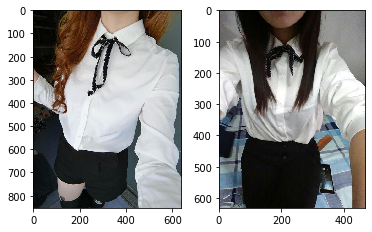

In [19]:
pair_id = '9263-2-1'
w=10
h=10
fig=plt.figure(figsize=(16, 8))
columns = 5
rows = 2
idx = 1
for i, r in dt_all[dt_all['pair_unique_id'] == pair_id].iterrows():
    img_full_path = '../../../DeepFashion2_Dataset/' + r.val + '/image/' + r.image_id
    with open(img_full_path, "rb") as f:
        with Image.open(f) as img:
            img = img.convert("RGB")
    # os.remove(img_full_path)
    fig.add_subplot(rows, columns, idx)
    idx += 1
    plt.imshow(img)
plt.show()

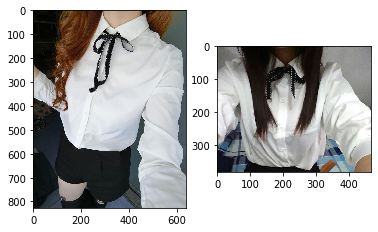

In [20]:
w=10
h=10
fig=plt.figure(figsize=(16, 8))
columns = 5
rows = 2
idx = 1
for i, r in dt_all[dt_all['pair_unique_id'] == pair_id].iterrows():
    img_full_path = '../../../DeepFashion2_Dataset/' + r.val + '/image/' + r.image_id
    bounding_box = r.bounding_box.replace('[','').replace(']','').replace(' ','').split(',')
    with open(img_full_path, "rb") as f:
        with Image.open(f) as img:
            img = img.convert("RGB")
            img = img.crop((int(bounding_box[0]), int(bounding_box[1]), int(bounding_box[2]), int(bounding_box[3]))) 
    # os.remove(img_full_path)
    fig.add_subplot(rows, columns, idx)
    idx += 1
    plt.imshow(img)
plt.show()